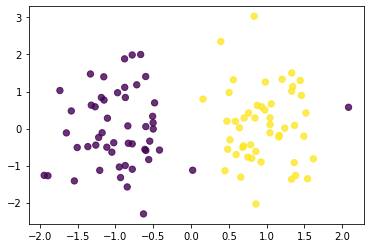

In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

with open('/Users/mig/Downloads/clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, marker='o', alpha=0.8, label='data')
plt.show()

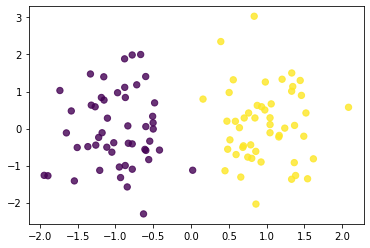

In [16]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2)
kmeans_model.fit(X)

predicted_labels = kmeans_model.labels_
plt.scatter(X[:, 0], X[:, 1], s=40, c=predicted_labels, marker='o', alpha=0.8, label='data')
plt.show()

In [129]:
for i in range(0, 10):
    print(centers[i][0], centers[i][1])

[-0.26832839 -0.79135012] [0.24816508 0.79686994]
[0.97792098 0.10168404] [-0.97742455 -0.03263543]
[-0.97988543 -0.82099058] [0.3814113  0.36722454]
[-0.84301048 -0.87529021] [0.3616448  0.42444482]
[ 0.56404351 -0.43127808] [-0.68883492  0.60383833]
[0.97792098 0.10168404] [-0.97742455 -0.03263543]
[-0.09763844 -0.4871053 ] [0.21812497 1.19557085]
[ 0.83776765 -0.22871674] [-0.87145568  0.30850989]
[ 0.99020356 -0.04629524] [-0.91355671  0.10912697]
[ 0.69563599 -0.2268057 ] [-0.96004919  0.39540861]


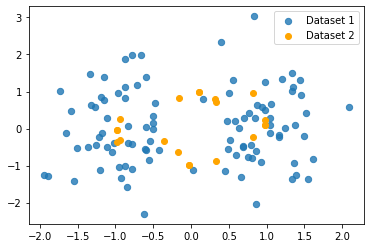

In [174]:
centers = []
for i in range(0,10):
    kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2)
    kmeans_model.fit(X)
    centers.insert(i,kmeans_model.cluster_centers_)

plt.scatter(X[:, 0], X[:, 1], s=40, marker='o', alpha=0.8, label='data')
for i in range(0,10):
    plt.scatter(centers[i][0][0], centers[i][0][1], color = 'orange')
    plt.scatter(centers[i][1][1], centers[i][1][0], color = 'orange')
plt.legend(["Dataset 1", "Dataset 2"])
plt.show()

In [196]:
import numpy as np

clust = np.array([
 [-0.5972191612445694, -0.5919098916910581],
 [-1.5838020751869848, 0.4743393635868491],
 [-1.892642118066139, -1.2770390481464395],
 [-1.021761443519372, -0.38446059106320013],
 [-0.628271339507516, -2.308149346281125],
 [-0.7180915776856387, 1.1805550909358404],
 [-1.543143767548152, -1.4163791359687334],
 [0.022103701018375554, -1.1279478858865397],
 [-0.7776518874305778, -0.4157532453316538],
 [-1.2073577296008344, -1.1308523658604184]
])

centroid = np.array([-0.9774245525274352, -0.032635425821084516])

intra_cluster_distance = np.sum((clust[:,0] - centroid[0])**2 + (clust[:,1] - centroid[1])**2)

print(intra_cluster_distance)

import unittest

class TestNotebook(unittest.TestCase):
    def test_task(self):
        self.assertAlmostEqual(intra_cluster_distance, 11.44058, places=5)

unittest.main(argv=[''], verbosity=2, exit=False)

test_task (__main__.TestNotebook) ... 

16.31211696438564


FAIL

FAIL: test_task (__main__.TestNotebook)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-196-e14d9a914a92>", line 26, in test_task
    self.assertAlmostEqual(intra_cluster_distance, 11.44058, places=5)
AssertionError: 16.31211696438564 != 11.44058 within 5 places (4.8715369643856405 difference)

----------------------------------------------------------------------
Ran 1 test in 0.009s

FAILED (failures=1)


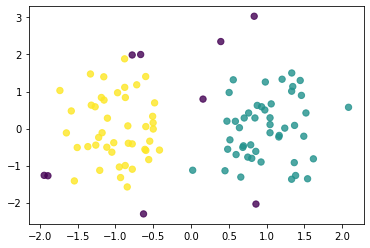

In [206]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.6, min_samples=8).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

labels = db.labels_

plt.scatter(X[:, 0], X[:, 1], s=40, c=labels, marker='o', alpha=0.8, label='data')
plt.show()

In [229]:
from sklearn.metrics import silhouette_score

model = KMeans(n_clusters=2).fit(X)
model2 = KMeans(n_clusters=4).fit(X)


score = silhouette_score(X, model.labels_)
score2 = silhouette_score(X, model2.labels_)

print("Качество кластеризации по метрице силуэтта для 2-х кластеров %.3f" % score)
print("Качество кластеризации по метрице силуэтта для 4-х кластеров %.3f" % score2)



Качество кластеризации по метрице силуэтта для 2-х кластеров 0.447
Качество кластеризации по метрице силуэтта для 4-х кластеров 0.443


In [236]:
from sklearn.metrics.cluster import adjusted_mutual_info_score

model = KMeans(n_clusters=2).fit(X)
score = adjusted_mutual_info_score(Y, model.labels_, average_method='arithmetic')

mode2 = KMeans(n_clusters=4).fit(X)
scor2 = adjusted_mutual_info_score(Y, model2.labels_, average_method='arithmetic')

print("Качество кластеризации по метрике AMI %.3f для 2-х кластеров" % score)
print("Качество кластеризации по метрике AMI %.3f для 4-х кластеров" % score2)

Качество кластеризации по метрике AMI 0.929 для 2-х кластеров
Качество кластеризации по метрике AMI 0.443 для 4-х кластеров


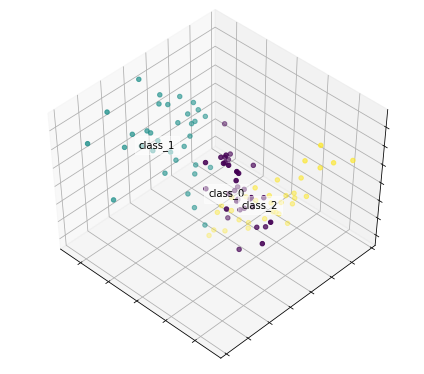

In [237]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

df_source = pd.read_csv('/Users/mig/Downloads/client_segmentation.csv')
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values
# и визуализируем их
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134); plt.cla()
num_labels = np.unique(y).size
for name, label in [('class_%d' % i, i) for i in range(num_labels)]:
    ax.text3D(X[y == label, 0].mean(), X[y == label, 1].mean() + 0.5,
        X[y == label, 2].mean(), name, horizontalalignment='center',
        bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.w_xaxis.set_ticklabels([]); ax.w_yaxis.set_ticklabels([]); ax.w_zaxis.set_ticklabels([])
plt.show()

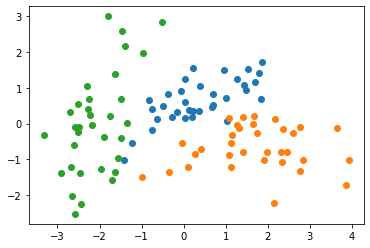

In [295]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)
for name, label in [('class_%d' % i, i) for i in range(num_labels)]:
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1])
plt.show()

<class 'numpy.ndarray'> (202, 310, 3)


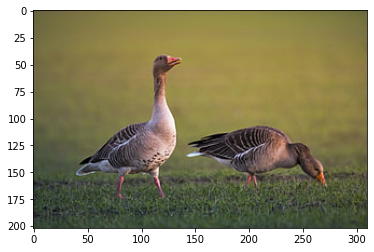

In [270]:
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
img = mpimg.imread('/Users/mig/Downloads/gray_goose.jpg')
print(type(img),img.shape)
imshow(img)
plt.show()

<class 'numpy.ndarray'> (202, 310)


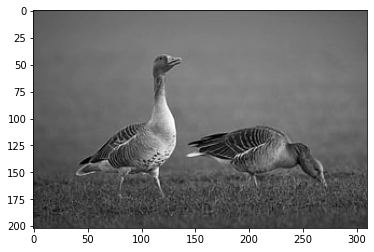

In [271]:
def rgb2gray(rgb):
    tile = np.tile(np.c_[0.333, 0.333, 0.333], reps=(rgb.shape[0],rgb.shape[1],1))
    return np.sum(tile * rgb, axis=2)

img_gray = rgb2gray(img)
print(type(img_gray), img_gray.shape)
imshow(img_gray, cmap = "gray")
plt.show()


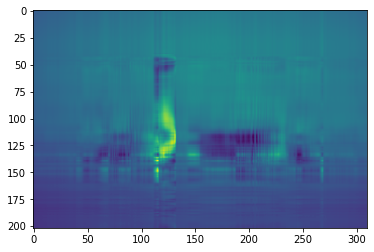

In [276]:
from sklearn.decomposition import TruncatedSVD

svd_model = TruncatedSVD(n_components=5).fit(img_gray)
img_gray_svd = svd_model.transform(img_gray)
img_gray_svd_restored = svd_model.inverse_transform(img_gray_svd)
imshow(img_gray_svd_restored)



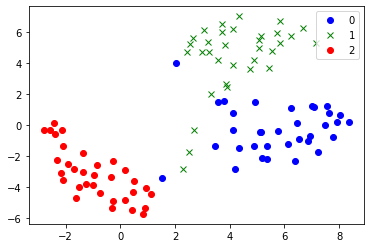

In [299]:
from sklearn.manifold import TSNE

tsne_transformer = TSNE(n_components=2)

x_tsne = tsne_transformer.fit_transform(X)

colors = ['bo', 'gx', 'ro']
# И нарисуем получившиеся точки в нашем новом пространстве
for name, label, color in [('class_%d' % i, i, colors[i]) for i in range(num_labels)]:
    plt.plot(x_tsne[y == label, 0], x_tsne[y == label, 1], color, label=label)
plt.legend(loc=0);

In [303]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

def eval_model(input_x, input_y):
    """Обучаем и валидируем модель"""
    X_train, X_test, y_train, y_test = train_test_split(
        input_x, input_y, test_size=.3, stratify=y, random_state=42
    )
    # Для примера возьмём неглубокое дерево решений
    clf = DecisionTreeClassifier(max_depth=2, random_state=42)
    clf.fit(X_train, y_train)
    preds = clf.predict_proba(X_test)
    acc_score = accuracy_score(y_test, preds.argmax(axis=1))
    print('Accuracy: %.5f' % acc_score)
    
df_source = pd.read_csv('/Users/mig/Downloads/client_segmentation.csv')
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values

In [305]:
eval_model(x_tsne, y)

Accuracy: 0.96667


In [307]:
eval_model(X_pca, y)

Accuracy: 0.83333
